
    
    - 컬럼
    Country: 국가
    Region: 국가의 지역
    Happiness Rank: 행복지수 순위
    Happiness Score: 행복지수 점수
    GDP per capita: 1인당 GDP
    Healthy Life Expectancy: 건강 기대수명
    Social support: 사회적 지원
    Freedom to make life choices: 삶에 대한 선택의 자유
    Generosity: 관용
    Corruption Perception: 부정부패
    Dystopia + Residual: 그 외

    
- 데이터 출처: https://www.kaggle.com/mathurinache/world-happiness-report


## Step 1. 데이터셋 로드

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = dict()
df['2015'] = pd.read_csv("/content/drive/MyDrive/data/world_happiness_report/2015.csv")
df['2016'] = pd.read_csv("/content/drive/MyDrive/data/world_happiness_report/2016.csv")
df['2017'] = pd.read_csv("/content/drive/MyDrive/data/world_happiness_report/2017.csv")
df['2018'] = pd.read_csv("/content/drive/MyDrive/data/world_happiness_report/2018.csv")
df['2019'] = pd.read_csv("/content/drive/MyDrive/data/world_happiness_report/2019.csv")
df['2020'] = pd.read_csv("/content/drive/MyDrive/data/world_happiness_report/2020.csv")

In [5]:
df['2020'].head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


## Step 2. 데이터프레임 구성


### 년도별 데이터 표준화


In [6]:
for key in df:
  print(key, df[key].columns) # 각 데이터프레임의 컬럼 확인

2015 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expe

In [7]:
# 각 년도별로 다른 정보를 가진 데이터 프레임의 Column을 동일하게 표준화
cols = ['country', 'score', 'economy', 'family', 'health', 'freedom', 'trust', 'generosity', 'residual']

In [8]:
df['2015'].drop(['Region', 'Happiness Rank', 'Standard Error'], axis=1, inplace=True) # generosity, trust 순서 반대
df['2016'].drop(['Region', 'Happiness Rank', 'Lower Confidence Interval',
                 'Upper Confidence Interval'], axis=1, inplace=True) # generosity, trust 순서 반대
df['2017'].drop(['Happiness.Rank', 'Whisker.high', 'Whisker.low'], axis=1, inplace=True) 
df['2018'].drop(['Overall rank'], axis=1, inplace=True) # residual 없음
df['2019'].drop(['Overall rank'], axis=1, inplace=True) # residual 없음
df['2020'].drop(['Regional indicator', 'Standard error of ladder score', 
                 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
                 'Social support', 'Healthy life expectancy',
                 'Freedom to make life choices', 'Generosity',
                 'Perceptions of corruption', 'Ladder score in Dystopia'], axis=1, inplace=True)

In [9]:
df['2018']['residual'] = df['2018']['Score'] - df['2018'][['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis=1)
df['2019']['residual'] = df['2019']['Score'] - df['2019'][['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis=1)

In [10]:
df['2015'] = df['2015'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)',
       'Dystopia Residual']]
df['2016'] = df['2016'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)',
       'Dystopia Residual']]

In [11]:
for key in df:
  print(key, df[key].columns) # 각 데이터프레임의 컬럼 다시 확인

2015 Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'residual'],
      dtype='object')
2019 Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life 

In [12]:
# 컬럼명 맞춰주기
for key in df:
  df[key].columns = cols

### 하나의 데이터프레임으로 합치기


In [15]:
df_all = pd.concat(df, axis=0)
df_all.index.names = ['year', 'rank']

In [16]:
df_all

country   score  ...  generosity  residual
year rank                                    ...                      
2015 0                  Switzerland  7.5870  ...    0.419780  2.517380
     1                      Iceland  7.5610  ...    0.141450  2.702010
     2                      Denmark  7.5270  ...    0.483570  2.492040
     3                       Norway  7.5220  ...    0.365030  2.465310
     4                       Canada  7.4270  ...    0.329570  2.451760
...                             ...     ...  ...         ...       ...
2020 148   Central African Republic  3.4759  ...    0.028265  2.860198
     149                     Rwanda  3.3123  ...    0.485542  0.548445
     150                   Zimbabwe  3.2992  ...    0.080929  0.841031
     151                South Sudan  2.8166  ...    0.111157  1.378751
     152                Afghanistan  2.5669  ...    0.001226  1.507236

[935 rows x 9 columns]

### 데이터프레임 정리

In [17]:
df_all.reset_index(inplace=True)
df_all['rank'] +=1

In [18]:
df_all

,year,rank,country,score,economy,family,health,freedom,trust,generosity,residual
0,2015,1,Switzerland,7.5870,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2.517380
1,2015,2,Iceland,7.5610,1.302320,1.402230,0.947840,0.628770,0.436300,0.141450,2.702010
2,2015,3,Denmark,7.5270,1.325480,1.360580,0.874640,0.649380,0.341390,0.483570,2.492040
3,2015,4,Norway,7.5220,1.459000,1.330950,0.885210,0.669730,0.346990,0.365030,2.465310
4,2015,5,Canada,7.4270,1.326290,1.322610,0.905630,0.632970,0.458110,0.329570,2.451760
...,...,...,...,...,...,...,...,...,...,...,...
930,2020,149,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
931,2020,150,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
932,2020,151,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
933,2020,152,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


###  Pivot을 이용하여 데이터프레임 재구성

In [21]:
rank_table = df_all.pivot(index='country', columns='year', values='rank')
rank_table.sort_values('2020', inplace=True)

In [22]:
rank_table

year,2015,2016,2017,2018,2019,2020
country,,,,,,
Finland,6.0,5.0,5.0,1.0,1.0,1.0
Denmark,3.0,1.0,2.0,3.0,2.0,2.0
Switzerland,1.0,2.0,4.0,5.0,6.0,3.0
Iceland,2.0,3.0,3.0,4.0,4.0,4.0
Norway,4.0,4.0,1.0,2.0,3.0,5.0
...,...,...,...,...,...,...
Sudan,118.0,133.0,130.0,137.0,NaN,NaN
Suriname,40.0,40.0,NaN,NaN,NaN,NaN
Syria,156.0,156.0,152.0,150.0,149.0,NaN


## Step 3. 데이터 시각화 

### 년도별 순위 변화 시각화

In [25]:
fig = plt.figure(figsize=(20,50))
rank2020 = rank_table['2020'].dropna()

for c in rank2020.index:
  t = rank_table.loc[c].dropna()
  plt.plot(t.index, t, '.-')

plt.xlim(['2015', '2020'])
plt.ylim([0, rank_table.max().max() + 1])
plt.yticks(rank2020, rank2020.index)
ax = plt.gca() # get current axis
ax.invert_yaxis()
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
ax.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### 분야별로 나누어 점수 시각화

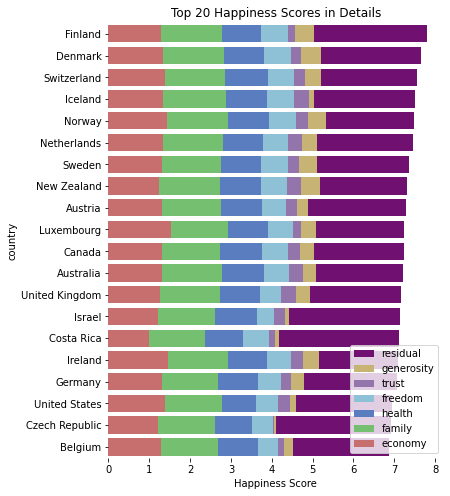

In [41]:
fig = plt.figure(figsize=(6, 8))

# 2020년도 상위 20개 누적합 시각화
data = df_all[df_all['year']=='2020']
data = data.loc[data.index[:20]]

d = data[data.columns[4:]].cumsum(axis=1) # 누적합
d = d[d.columns[::-1]] # residual 컬럼부터
d['country'] = data['country']

sns.set_color_codes('muted') # 색깔 톤다운
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'purple'][::-1]
for idx, c in enumerate(d.columns[:-1]):
  sns.barplot(x=c, y='country', data=d, label=c, color=colors[idx])

plt.legend(loc='lower right')
plt.title('Top 20 Happiness Scores in Details')
plt.xlabel('Happiness Score')
sns.despine(left=True, bottom=True)

###  Column간의 상관성 시각화

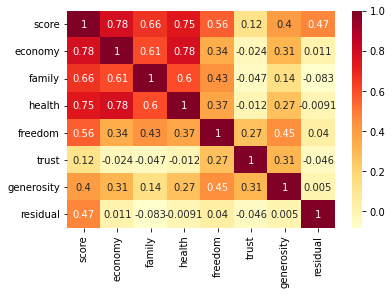

In [26]:
sns.heatmap(df_all.drop('rank', axis=1).corr(), annot=True, cmap='YlOrRd')

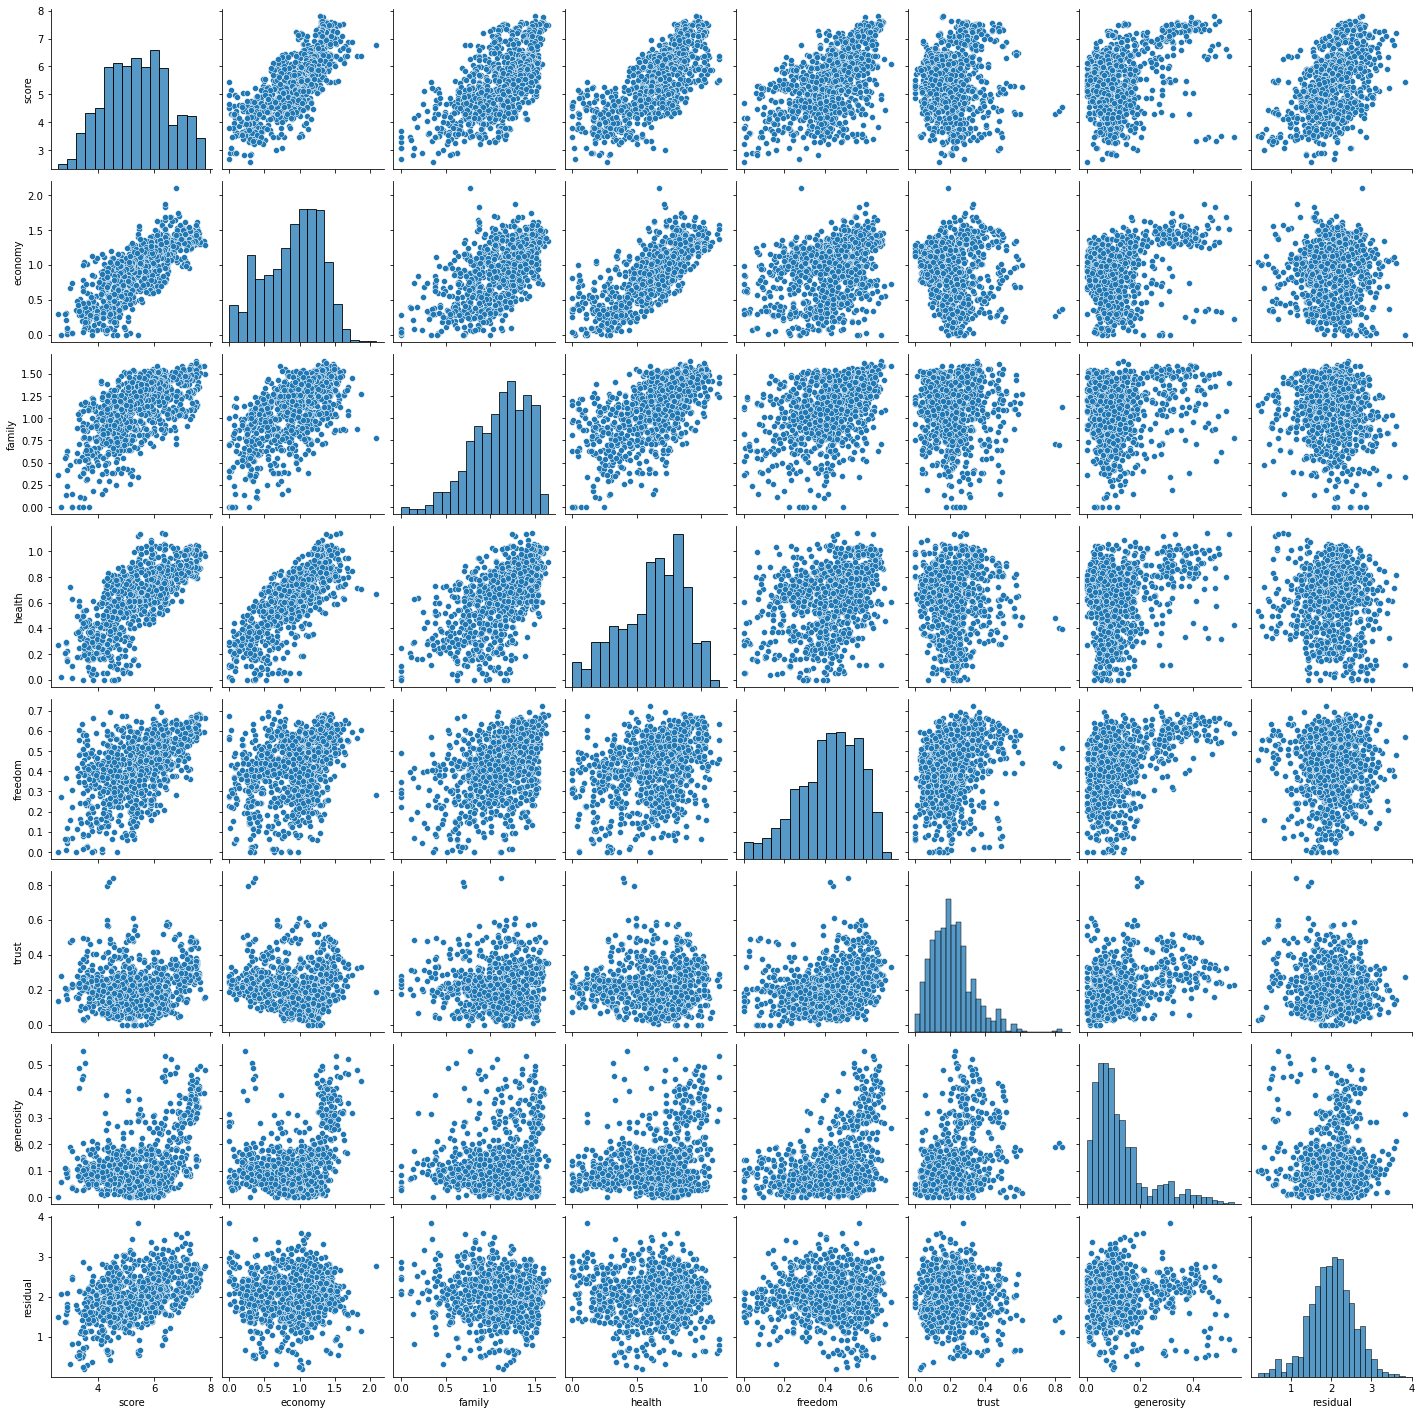

In [27]:
sns.pairplot(df_all.drop('rank', axis=1))

## Step 4. 모델 학습을 위한 데이터 전처리 

### 모델의 입력과 출력 정의

In [28]:
col_input_list = ['economy', 'family', 'health', 'freedom', 'generosity', 'trust']
col_out = 'score'

### 학습데이터와 테스트데이터 분리


In [56]:
# 2015년 ~ 2019년도 데이터를 학습 데이터로, 2020년도 데이터를 테스트 데이터로 분리
df_train = df_all[df_all['year'] != '2020']
df_test = df_all[df_all['year']== '2020']

X_train = df_train[col_input_list]
y_train = df_train[col_out]
X_test = df_test[col_input_list]
y_test = df_test[col_out]

### StandardScaler를 이용해 학습 데이터 표준화


In [30]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()
scaler.fit(X_train)

X_norm = scaler.transform(X_train)
X_train = pd.DataFrame(X_norm, index=X_train.index, columns=X_train.columns)

X_norm = scaler.transform(X_test)
X_test = pd.DataFrame(X_norm, index=X_test.index, columns=X_test.columns)

## Step 5. Regression 모델 학습하기

### Linear Regression 모델 학습

In [44]:
from sklearn.linear_model import LinearRegression

In [58]:
X_train.fillna(0, inplace=True)

In [59]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

### 모델 학습 결과 평가

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [60]:
pred = model_lr.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

0.4411766043832984
0.5666831855845988


### XGBoost Regression 모델 학습

In [61]:
from xgboost import XGBRegressor

In [62]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[17:28:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

###  모델 학습 결과 평가

In [63]:
pred = model_xgb.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

0.4008115506377966
0.5032488531532971


## Step 6. 모델 학습 결과  분석

###실제 값과 추측 값의 Scatter plot 시각화


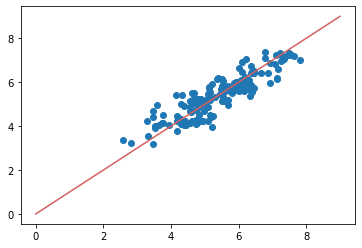

In [64]:
plt.scatter(x=y_test, y=pred)
plt.plot([0, 9], [0, 9], 'r-')
plt.show()

### LinearRegression 모델의 Coefficient 시각화


<BarContainer object of 6 artists>

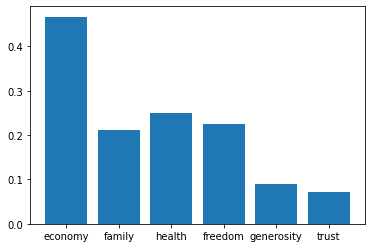

In [65]:
plt.bar(X_train.columns, model_lr.coef_)

### XGBoost 모델의 Feature Importance 시각화


<BarContainer object of 6 artists>

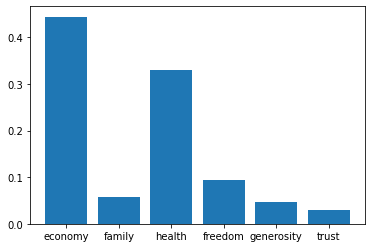

In [66]:
plt.bar(X_train.columns, model_xgb.feature_importances_)